In [1]:
import  tensorflow as tf
from tensorflow import  keras

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5


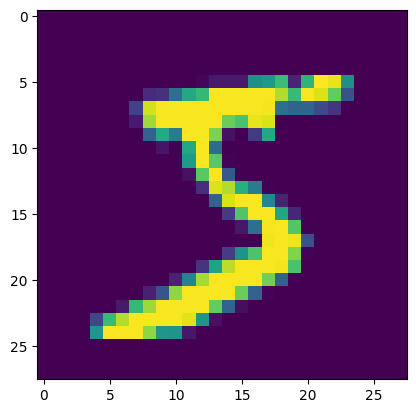

In [6]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print(y_train[0])

In [7]:
x_train=x_train/255
x_test=x_test/255

In [8]:
from keras.engine.sequential import Sequential
model=Sequential()

In [9]:
from tensorflow.keras.layers import Flatten,Dense

In [10]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation="softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer="Adam",loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [13]:
history=model.fit(x_train,y_train,batch_size=64,epochs=20,verbose=1,validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 12s 14ms/step - loss: 0.3311 - accuracy: 0.9072 - val_loss: 0.1794 - val_accuracy: 0.9516
Epoch 2/20
750/750 [==============================] - 10s 13ms/step - loss: 0.1535 - accuracy: 0.9561 - val_loss: 0.1314 - val_accuracy: 0.9628
Epoch 3/20
750/750 [==============================] - 5s 6ms/step - loss: 0.1054 - accuracy: 0.9693 - val_loss: 0.1123 - val_accuracy: 0.9675
Epoch 4/20
750/750 [==============================] - 5s 7ms/step - loss: 0.0807 - accuracy: 0.9766 - val_loss: 0.0982 - val_accuracy: 0.9703
Epoch 5/20
750/750 [==============================] - 4s 6ms/step - loss: 0.0633 - accuracy: 0.9810 - val_loss: 0.0912 - val_accuracy: 0.9738
Epoch 6/20
750/750 [==============================] - 4s 6ms/step - loss: 0.0502 - accuracy: 0.9853 - val_loss: 0.0894 - val_accuracy: 0.9737
Epoch 7/20
750/750 [==============================] - 5s 7ms/step - loss: 0.0405 - accuracy: 0.9882 - val_loss: 0.0921 - val_accuracy: 0.9725
Ep

In [14]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0982 - accuracy: 0.9785


[0.0982368066906929, 0.9785000085830688]

In [15]:
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [16]:
import numpy as np

In [17]:
np.argmax(y_pred, axis=1)

array([7, 2, 1, ..., 4, 5, 6])

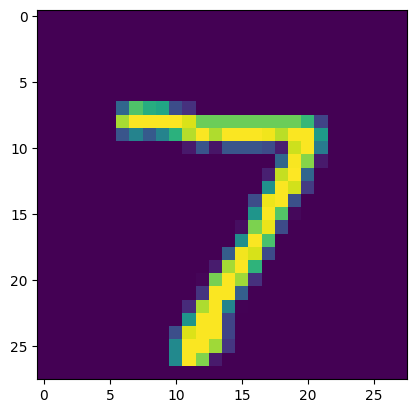

In [18]:
plt.imshow(x_test[0])

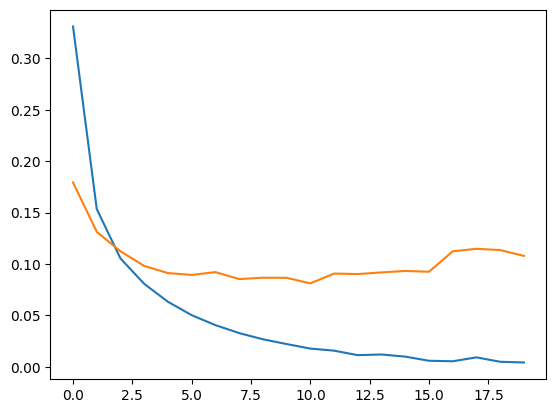

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


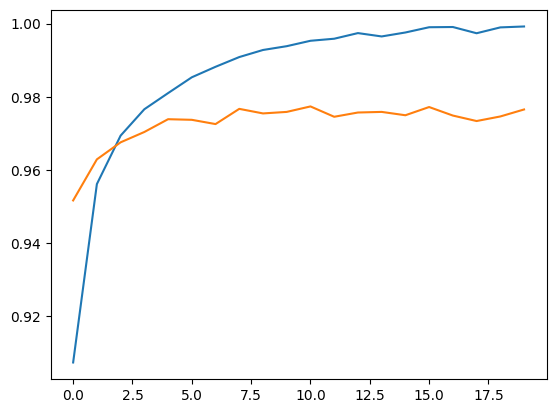

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])